# Correlations: How Social Media and the Forex Market Relate

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pickle

from matplotlib import style
style.use("ggplot")
pd.options.mode.chained_assignment = None  # default='warn'

Data retrived from [histdata.com](http://www.histdata.com/download-free-forex-historical-data/?/metatrader/1-minute-bar-quotes/usdmxn/2016/10)

In [264]:
# Loading intraday FX: USD v.s. MXN
usd_mxn = pd.read_csv("../secret_files/DAT_MT_USDMXN_M1_201610.csv", 
                      names=["Date","Time","mxn_usd","t2","t3","t4","t5"])

usd_mxn = usd_mxn[["Date", "Time", "mxn_usd"]]

format_time = lambda strtime: strtime.replace(":",".")
to_datetime = lambda input_list: datetime(*[int(x) for x in input_list.split(".")])

# Format Date and time and place it as the index
usd_mxn.index = (usd_mxn["Date"] + "." + usd_mxn["Time"].apply(format_time)).apply(to_datetime)
usd_mxn.drop(["Date", "Time"], axis=1, inplace=True)

In [265]:
usd_mxn.head(5)

,mxn_usd
2016-10-02 17:01:00,19.37168
2016-10-02 17:02:00,19.36975
2016-10-02 17:03:00,19.37475
2016-10-02 17:09:00,19.37475
2016-10-02 17:14:00,19.36730


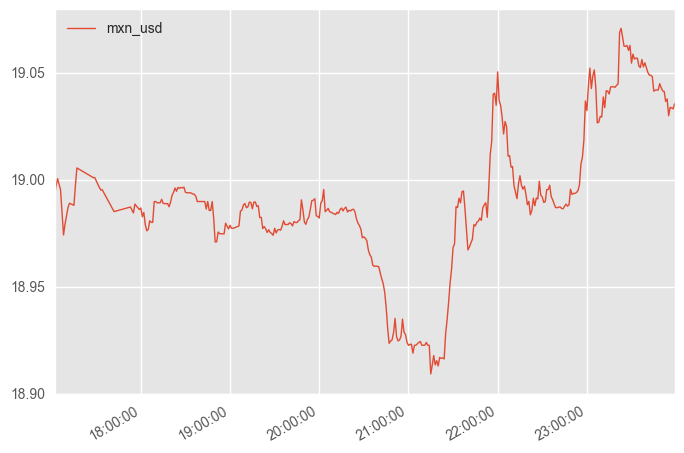

In [266]:
usd_mxn[usd_mxn.index.day == 9].plot(linewidth=1)
plt.show()

In [ ]:
# Loading tweets data
with open("../secret_files/debate.pickle", "rb") as f:
    debate_data = pickle.load(f)
len(debate_data)

In [16]:
# First and last retrieved tweet
print(debate_data[0].created_at)
print(debate_data[-1].created_at)

Sun Oct 09 23:59:59 +0000 2016
Sun Oct 09 15:56:03 +0000 2016


In [34]:
debate_df = [tweet.AsDict() for tweet in debate_data]
debate_df = pd.DataFrame(debate_df)

In [37]:
debate_df.head(3)

,coordinates,created_at,favorite_count,geo,hashtags,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,place,possibly_sensitive,retweet_count,retweeted_status,source,text,truncated,urls,user,user_mentions
0,NaN,Sun Oct 09 23:59:59 +0000 2016,NaN,NaN,"[{'text': 'sorrynotsorry'}, {'text': 'debate'}]",785268603868307456,785268603868307456,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Trump giving voice to attacked accusers or usi...,NaN,"[{'url': 'https://t.co/nyARt0OM8L', 'expanded_...","{'statuses_count': 2509, 'id': 547770641, 'cre...",[]
1,NaN,Sun Oct 09 23:59:59 +0000 2016,NaN,NaN,"[{'text': 'Trump'}, {'text': 'Hillary'}]",785268603797049345,785268603797049345,MaddowBlog,NaN,91180720.0,...,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@MaddowBlog @MSNBC No1 likes as home wrecker n...,NaN,[],"{'statuses_count': 8679, 'id': 2893472667, 'cr...","[{'id': 91180720, 'name': 'Maddow Blog', 'scre..."
2,NaN,Sun Oct 09 23:59:57 +0000 2016,NaN,NaN,[{'text': 'debate'}],785268597656526848,785268597656526848,NaN,NaN,NaN,...,NaN,NaN,1.0,"{'id': 785268032897626112, 'user_mentions': []...","<a href=""http://twitter.com/download/iphone"" r...",RT @brainfodder: #debate or rape trial from th...,NaN,[],"{'statuses_count': 14676, 'id': 544735156, 'cr...","[{'id': 85834587, 'name': 'Brian F. Odder', 's..."


In [38]:
debate_df.columns

Index(['coordinates', 'created_at', 'favorite_count', 'geo', 'hashtags', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'lang', 'media', 'place', 'possibly_sensitive',
       'retweet_count', 'retweeted_status', 'source', 'text', 'truncated',
       'urls', 'user', 'user_mentions'],
      dtype='object')

In [41]:
debate_df["text"][:10]

0    Trump giving voice to attacked accusers or usi...
1    @MaddowBlog @MSNBC No1 likes as home wrecker n...
2    RT @brainfodder: #debate or rape trial from th...
3    @PrisonPlanet do you even think trump is good ...
4    RT @Realjmannarino: I don't know if Donald Tru...
5    if i had to choose between hillary or trump i'...
6    RT @VoteTrumpPics: Crooked @HillaryClinton is ...
7    RT @JonLemire: Trump, pre-debate, with women w...
8    RT @VoteTrumpPics: Crooked @HillaryClinton is ...
9    Hillary is the worst human being and Trump ain...
Name: text, dtype: object

In [69]:
debate_df["created_at"][:10]

0    Sun Oct 09 23:59:59 +0000 2016
1    Sun Oct 09 23:59:59 +0000 2016
2    Sun Oct 09 23:59:57 +0000 2016
3    Sun Oct 09 23:59:57 +0000 2016
4    Sun Oct 09 23:59:56 +0000 2016
5    Sun Oct 09 23:59:56 +0000 2016
6    Sun Oct 09 23:59:53 +0000 2016
7    Sun Oct 09 23:59:51 +0000 2016
8    Sun Oct 09 23:59:51 +0000 2016
9    Sun Oct 09 23:59:49 +0000 2016
Name: created_at, dtype: object

In [68]:
def format_twitter_time(date):
    date_list = [2016, 10, 9]
    
    # Split hour, minute and second, put it in a list
    date = date[11:19].split(":")
    
    # Trasform each element from string to int and
    # place it inside 'date_list'
    for element in date:
        date_list.append(int(element))
    
    return datetime(*date_list)

debate_df["created_at"].apply(format_twitter_time)[:10]

0   2016-10-09 23:59:59
1   2016-10-09 23:59:59
2   2016-10-09 23:59:57
3   2016-10-09 23:59:57
4   2016-10-09 23:59:56
5   2016-10-09 23:59:56
6   2016-10-09 23:59:53
7   2016-10-09 23:59:51
8   2016-10-09 23:59:51
9   2016-10-09 23:59:49
Name: created_at, dtype: datetime64[ns]

In [73]:
# Set the date of the creation of the tweet as the index
debate_df.index = debate_df["created_at"].apply(format_twitter_time)
# Sort the index from oldest to latest
debate_df.sort_index(inplace=True)

In [236]:
# Create a new DataFrame with only the texts
ddf = debate_df[["text"]]
# Count instances of Trumps
ddf["Trumps"] = [tweet.lower().count("trump") for tweet in ddf.text.values]
ddf["Debate"] = [tweet.lower().count("debate") for tweet in ddf.text.values]

In [248]:
# Making a dataframe counting the number of instances 'Trump' was
# said per minute
word_count = ddf.groupby([ddf.index.hour, ddf.index.minute]).sum()

times = []
counts = {"trump_count":[],
          "debate_count":[]}

for time, value in zip(test_counts.index, word_count.values):
    hour, minute = time
    times.append(datetime(year=2016, month=10, day=9, hour=hour, minute=minute))
    
    for ix, key in enumerate(counts):
        counts[key].append(value[ix])
    
word_count = pd.DataFrame(counts, index=times)

### Selecting the data where the number of tweets overlap the FX data 

In [250]:
(min(usd_mxn[usd_mxn.index.day == 9].index))

Timestamp('2016-10-09 17:02:00')

In [183]:
min(trump_counts.index)

Timestamp('2016-10-09 15:56:00')

In [182]:
max(usd_mxn[usd_mxn.index.day == 9].index)

Timestamp('2016-10-09 23:59:00')

In [184]:
max(trump_counts.index)

Timestamp('2016-10-09 23:59:00')

In [252]:
word_count = word_count[word_count.index >= (min(usd_mxn[usd_mxn.index.day == 9].index))]

### Normalize the data

In [267]:
fx_debate = word_count.join(usd_mxn[usd_mxn.index.day == 9])
fx_debate_norm = (fx_debate - fx_debate.mean()) / fx_debate.std()

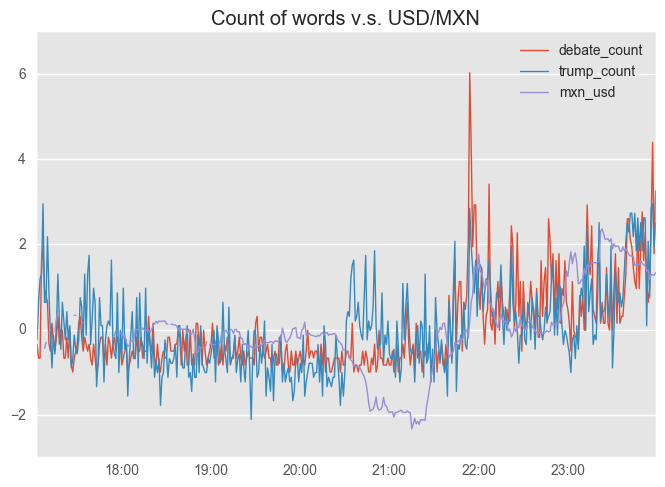

In [268]:
fx_debate_norm.plot(linewidth=1)
plt.title("Count of words v.s. USD/MXN")
plt.show()

In [269]:
fx_debate.corr()

,debate_count,trump_count,mxn_usd
debate_count,1.000000,0.684761,0.521047
trump_count,0.684761,1.000000,0.396875
mxn_usd,0.521047,0.396875,1.000000


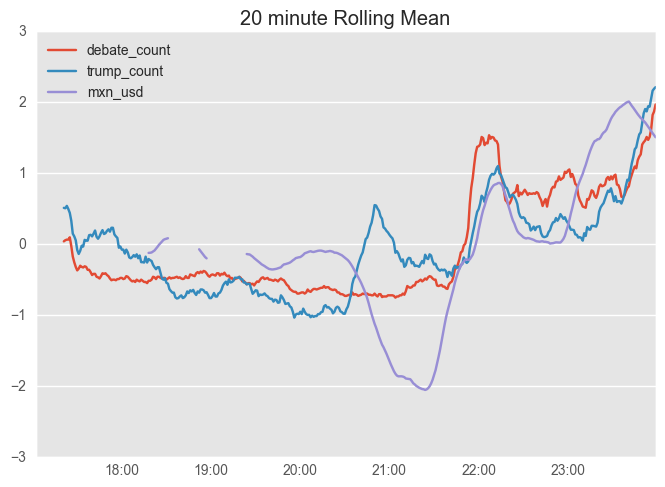

In [270]:
fx_debate_norm.rolling(window=20).mean().plot()
plt.title("20 minute Rolling Mean")
plt.show()

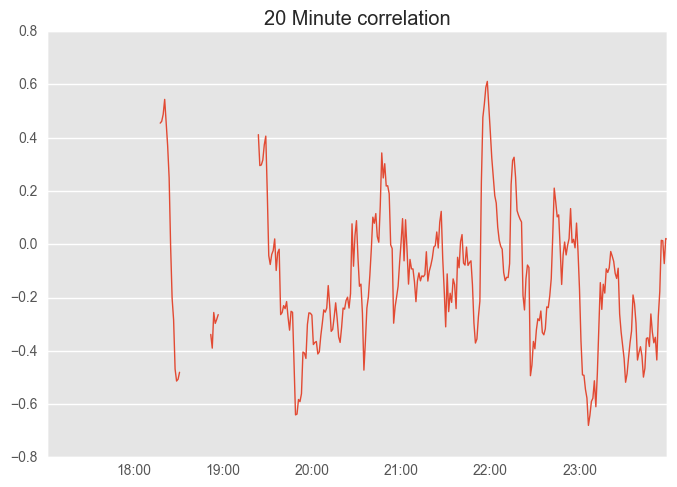

In [272]:
fx_debate.debate_count.rolling(window=20).corr(fx_debate.mxn_usd).plot(linewidth=1)
plt.title("20 Minute correlation")
plt.show()

created_at
2016-10-09 15:56:03    Back to some serious policy issues: Even a wiz...
2016-10-09 15:56:05    Focus group: Do you want Hillary or Trump's he...
2016-10-09 15:56:07    Help me to win #galaxynote7 and by the way poo...
2016-10-09 15:56:09    For Trump it's not whether it's true or not. H...
2016-10-09 15:56:10    RT @WayneRoot: Trump's offensive words don't c...
2016-10-09 15:56:18    RT @V_of_Europe: FARAGE: ‘Why Should Trump Be ...
2016-10-09 15:56:19    @AndersonCooper  Be fair with Trump tonight an...
2016-10-09 15:56:20    @_wmgalliher I'm betting on the Vanderbilt in ...
2016-10-09 15:56:20    RT @WDFx2EU7: EXCLUSIVE! TRUMP or was it OBAMA...
2016-10-09 15:56:25    RT @V_of_Europe: FARAGE: ‘Why Should Trump Be ...
2016-10-09 15:56:25    RT @DavidLimbaugh: I don’t know how effective ...
2016-10-09 15:56:27    RT @riocat5: Sunday nights decision. \nChris C...
2016-10-09 15:56:28    RT @Lrihendry: Dear media, we are not concerne...
2016-10-09 15:56:28    RT @V_of_Europe: 